# IT 503 STRATEGIC & PLANNING MANAGEMENT 
TUMWESIGE BRIDGET 
MAY21/PGDIT/565U

•	In this test, you will design models to predict the number of deaths due to covid-19 Pandemic in Africas region. Data set can be grabbed from URL: https://github.com/mkumakech/Covid-19_Pandemic/blob/master/Africa_Covid.csv
•	Use python 3.7 or higher for implementation. 
•	Take the screen shots of your codes and upload in the university platform and also share your uploaded codes/output in your Github account with the Instructor.
•	Use the following methodology with respective performance evaluation metrics such as correlations, p-value, and F-1Scores:
1.	Pearson Correlations  (5 marks)
2.	Decision Trees Classifier. (15 marks)


In [1]:
#importing libraries 
! pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

In [2]:
Data=pd.read_csv("WHO COVID-19 global table data July 11th 2021 at 3.07.37 PM.csv",sep=",")

In [3]:
Data

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
0,Global,NaN,185291530,2377.196364,2906590,37.290076,458355,4010834,51.456966,55457,0.711485,8516,NaN
1,United States of America,Americas,33451965,10106.250000,108004,32.630000,22569,601231,181.640000,1551,0.470000,301,Community transmission
2,India,South-East Asia,30752950,2228.470000,294699,21.350000,43393,405939,29.420000,5627,0.410000,911,Clusters of cases
3,Brazil,Americas,18909037,8895.880000,351896,165.550000,54022,528540,248.660000,10474,4.930000,1648,Community transmission
4,Russian Federation,Europe,5733218,3928.630000,171858,117.760000,25766,141501,96.960000,4936,3.380000,726,Clusters of cases
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Saint Helena,Africa,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0,No cases
234,Tokelau,Western Pacific,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0,No cases
235,Tonga,Western Pacific,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0,No cases
236,Turkmenistan,Europe,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0,No cases


In [4]:
#Sorting for Africa only
Africa_data = Data.loc[(Data['WHO Region'] == 'Africa')]
Africa_data

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
18,South Africa,Africa,2135246,3600.22,139690,235.53,22910,63499,107.07,2470,4.16,460,Community transmission
70,Ethiopia,Africa,276799,240.77,549,0.48,116,4341,3.78,16,0.01,3,Community transmission
82,Kenya,Africa,187525,348.75,2988,5.56,566,3716,6.91,76,0.14,11,Community transmission
84,Zambia,Africa,170456,927.20,12624,68.67,1453,2672,14.53,401,2.18,54,Community transmission
85,Nigeria,Africa,168256,81.62,638,0.31,146,2122,1.03,2,0.00,0,Community transmission
88,Algeria,Africa,143652,327.59,3577,8.16,620,3798,8.66,72,0.16,12,Community transmission
100,Namibia,Africa,101001,3975.00,8132,320.04,1193,1812,71.31,226,8.89,70,Community transmission
103,Ghana,Africa,96971,312.08,1057,3.40,263,797,2.56,1,0.00,0,Community transmission
104,Uganda,Africa,85581,187.10,3498,7.65,602,2033,4.44,906,1.98,21,Community transmission
105,Mozambique,Africa,84922,271.70,7717,24.69,1437,939,3.00,55,0.18,5,Community transmission


In [5]:
#Rename columns
Africa_data.rename(columns = {'Name':'Country','Cases - cumulative total':'Cases(Cum.Total)', 
                         'Cases - cumulative total per 100000 population':'Cases(Cum.Total)per 100000 population', 
                         'Cases - newly reported in last 7 days':'Cases(last 7 days)', 
                         'Cases - newly reported in last 7 days per 100000 population':'Cases(last 7 days)per 100000 population', 
                         'Cases - newly reported in last 24 hours':'Cases(last 24 hours)', 
                         'Deaths - cumulative total':'Deaths(Cum.Total)','Deaths - cumulative total per 100000 population':
                         'Deaths(Cum.Total) per 100000 population', 'Deaths reported in last 7 days':
                         'Deaths(last 7 days)','Deaths - newly reported in last 7 days per 100000 population':
                         'Deaths(last 7 days)per 100000 population','Deaths - newly reported in last 24 hours':
                         'Deaths(last 24 hours)'}, inplace = True)

/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
#first ten rows
Africa_data.head(10)

,Country,WHO Region,Cases(Cum.Total),Cases(Cum.Total)per 100000 population,Cases(last 7 days),Cases(last 7 days)per 100000 population,Cases(last 24 hours),Deaths(Cum.Total),Deaths(Cum.Total) per 100000 population,Deaths - newly reported in last 7 days,Deaths(last 7 days)per 100000 population,Deaths(last 24 hours),Transmission Classification
18,South Africa,Africa,2135246,3600.22,139690,235.53,22910,63499,107.07,2470,4.16,460,Community transmission
70,Ethiopia,Africa,276799,240.77,549,0.48,116,4341,3.78,16,0.01,3,Community transmission
82,Kenya,Africa,187525,348.75,2988,5.56,566,3716,6.91,76,0.14,11,Community transmission
84,Zambia,Africa,170456,927.20,12624,68.67,1453,2672,14.53,401,2.18,54,Community transmission
85,Nigeria,Africa,168256,81.62,638,0.31,146,2122,1.03,2,0.00,0,Community transmission
88,Algeria,Africa,143652,327.59,3577,8.16,620,3798,8.66,72,0.16,12,Community transmission
100,Namibia,Africa,101001,3975.00,8132,320.04,1193,1812,71.31,226,8.89,70,Community transmission
103,Ghana,Africa,96971,312.08,1057,3.40,263,797,2.56,1,0.00,0,Community transmission
104,Uganda,Africa,85581,187.10,3498,7.65,602,2033,4.44,906,1.98,21,Community transmission
105,Mozambique,Africa,84922,271.70,7717,24.69,1437,939,3.00,55,0.18,5,Community transmission


In [7]:
#last ten rows
Africa_data.tail(10)

,Country,WHO Region,Cases(Cum.Total),Cases(Cum.Total)per 100000 population,Cases(last 7 days),Cases(last 7 days)per 100000 population,Cases(last 24 hours),Deaths(Cum.Total),Deaths(Cum.Total) per 100000 population,Deaths - newly reported in last 7 days,Deaths(last 7 days)per 100000 population,Deaths(last 24 hours),Transmission Classification
171,Burundi,Africa,5608,47.16,114,0.96,23,8,0.07,0,0.00,0,Community transmission
172,Niger,Africa,5529,22.84,37,0.15,3,194,0.80,1,0.00,0,Community transmission
175,Liberia,Africa,4994,98.74,690,13.64,0,135,2.67,6,0.12,0,Community transmission
176,Chad,Africa,4953,30.15,2,0.01,-19,174,1.06,0,0.00,0,Community transmission
180,Comoros,Africa,4046,465.27,33,3.79,10,146,16.79,0,0.00,0,Community transmission
182,Guinea-Bissau,Africa,3921,199.24,52,2.64,15,70,3.56,1,0.05,0,Community transmission
191,Sao Tome and Principe,Africa,2383,1087.34,14,6.39,0,37,16.88,0,0.00,0,Community transmission
194,Mauritius,Africa,2131,167.56,218,17.14,53,18,1.42,0,0.00,0,Community transmission
205,United Republic of Tanzania,Africa,509,0.85,0,0.00,0,21,0.04,0,0.00,0,Pending
233,Saint Helena,Africa,0,0.00,0,0.00,0,0,0.00,0,0.00,0,No cases


In [8]:
Africa_data.describe()

,Cases(Cum.Total),Cases(Cum.Total)per 100000 population,Cases(last 7 days),Cases(last 7 days)per 100000 population,Cases(last 24 hours),Deaths(Cum.Total),Deaths(Cum.Total) per 100000 population,Deaths - newly reported in last 7 days,Deaths(last 7 days)per 100000 population,Deaths(last 24 hours)
count,5.000000e+01,50.000000,50.000000,50.000000,50.00000,50.00000,50.000000,50.000000,50.000000,50.0000
mean,8.633754e+04,1143.887200,4279.780000,43.166800,714.84000,2030.82000,13.972400,95.140000,0.717800,14.8200
std,3.012241e+05,2741.566791,19747.421509,130.211952,3238.91064,8931.07879,23.501589,371.300198,2.078159,65.9015
min,0.000000e+00,0.000000,0.000000,0.000000,-19.00000,0.00000,0.000000,0.000000,0.000000,0.0000
25%,6.467000e+03,104.172500,39.750000,0.885000,0.00000,124.75000,1.327500,0.250000,0.000000,0.0000
50%,2.053350e+04,236.275000,227.500000,3.670000,41.00000,266.50000,3.670000,2.500000,0.045000,0.0000
75%,5.897200e+04,524.040000,1460.750000,12.977500,301.25000,1131.25000,12.872500,21.750000,0.175000,2.5000
max,2.135246e+06,16959.340000,139690.000000,835.820000,22910.00000,63499.00000,107.070000,2470.000000,11.180000,460.0000


In [9]:
Africa_data.shape

(50, 13)

In [10]:
 Africa_data['WHO Region'].value_counts().to_frame()

,WHO Region
Africa,50



Model Development

In [11]:
!conda install -c anaconda xlrd --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



# PEARSON CORRELATION

In [12]:
Africa_data.corr ()

,Cases(Cum.Total),Cases(Cum.Total)per 100000 population,Cases(last 7 days),Cases(last 7 days)per 100000 population,Cases(last 24 hours),Deaths(Cum.Total),Deaths(Cum.Total) per 100000 population,Deaths - newly reported in last 7 days,Deaths(last 7 days)per 100000 population,Deaths(last 24 hours)
Cases(Cum.Total),1.000000,0.117586,0.984003,0.212556,0.983108,0.995676,0.565080,0.929321,0.254718,0.973836
Cases(Cum.Total)per 100000 population,0.117586,1.000000,0.131966,0.883394,0.131685,0.116834,0.715322,0.109918,0.768600,0.138810
Cases(last 7 days),0.984003,0.131966,1.000000,0.239279,0.998796,0.991248,0.588592,0.943406,0.286134,0.992931
Cases(last 7 days)per 100000 population,0.212556,0.883394,0.239279,1.000000,0.239087,0.210433,0.647852,0.221325,0.935872,0.262271
Cases(last 24 hours),0.983108,0.131685,0.998796,0.239087,1.000000,0.990811,0.592462,0.940046,0.281758,0.990892
Deaths(Cum.Total),0.995676,0.116834,0.991248,0.210433,0.990811,1.000000,0.569713,0.934672,0.248791,0.980560
Deaths(Cum.Total) per 100000 population,0.565080,0.715322,0.588592,0.647852,0.592462,0.569713,1.000000,0.544979,0.667201,0.614779
Deaths - newly reported in last 7 days,0.929321,0.109918,0.943406,0.221325,0.940046,0.934672,0.544979,1.000000,0.321884,0.949720
Deaths(last 7 days)per 100000 population,0.254718,0.768600,0.286134,0.935872,0.281758,0.248791,0.667201,0.321884,1.000000,0.340897
Deaths(last 24 hours),0.973836,0.138810,0.992931,0.262271,0.990892,0.980560,0.614779,0.949720,0.340897,1.000000


In [13]:
Africa_data[['Cases(last 7 days)','Deaths - newly reported in last 7 days']].corr()

,Cases(last 7 days),Deaths - newly reported in last 7 days
Cases(last 7 days),1.000000,0.943406
Deaths - newly reported in last 7 days,0.943406,1.000000


data1: mean=4276.458 stdv=126.252
data2: mean=4300.944 stdv=135.293


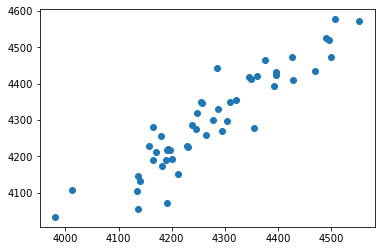

In [14]:
# generate related variables
#data1=cases in last 7days,std=130.211952,mean=4279.780000
#data2=deaths in last 24 hours, std=65.9015,mean =14.8200

from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
data1 = 130.211952 * randn(50) + 4279.780000
data2 = data1 + (65.9015 * randn(50) + 14.8200)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
pyplot.scatter(data1, data2)
pyplot.show()

In [15]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 130.211952 * randn(50) + 4279.780000
data2 = data1 + (65.9015 * randn(50) + 14.8200)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.925


In [16]:
import numpy as np

In [17]:
np.cov(data1,data2)

array([[16264.89395965, 16115.10062214],
       [16115.10062214, 18677.79939793]])

In [18]:
# calculate the covariance between two variables
from numpy.random import randn
from numpy.random import seed
from numpy import cov
# seed random number generator
seed(1)
# prepare data
data1 = 13082.564441 * randn(50) + 3215.760000
data2 = data1 + (25.245642 * randn(50) + 8.380000)
# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[1.64185690e+08 1.64179925e+08]
 [1.64179925e+08 1.64174557e+08]]


In [19]:
# calculate the covariance between two variables
from numpy.random import randn
from numpy.random import seed
from numpy import cov
# seed random number generator
seed(1)
# prepare data
data1 = 13082.564441 * randn(50) + 3215.760000
data2 = data1 + (25.245642 * randn(50) + 8.380000)
# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[1.64185690e+08 1.64179925e+08]
 [1.64179925e+08 1.64174557e+08]]


In [20]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 13082.564441 * randn(50) + 3215.760000
data2 = data1 + (25.245642 * randn(50) + 8.380000)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 1.000


# DECISION TREES CLASSIFIER

In [21]:
conda install -y lxml

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - lxml


The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2020.10.14-0 --> conda-forge::ca-certificates-2021.5.30-ha878542_0
  certifi                anaconda::certifi-2020.6.20-py36_0 --> conda-forge::certifi-2021.5.30-py36h5fab9bb_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [22]:
# Load libraries
import pandas as pd
import requests
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [23]:
import scipy.stats

In [24]:
r,p=scipy.stats.pearsonr(data1, data2)
r

0.9999987883025226

Deaths in Last 24 Hours

Deaths reported in the last 24hours are as a result of cases reported in the last 7days

In [25]:
CovidTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
CovidTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [26]:
import requests
import lxml.html as lh
import pandas as pd

In [27]:
WHO_url = 'https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases' #assign the wiki page
#WHO_url = 'https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases'

page = requests.get(WHO_url) # create a handle for contents of the wiki page

doc = lh.fromstring(page.content) # store content of the wiki page under doc

tr_elements = doc.xpath('//tr') # parse data stored between tr in the html

[len(T) for T in tr_elements[:12]] # check the length of the first 12 rows



[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]



Checking the table headers


In [28]:
tr_elements = doc.xpath('//tr') # parse first row as header

col = [] # create empty list
i = 0

for t in tr_elements[0]: # for each row, store each first element (header) and an empty list
    i+=1
    name=t.text_content()
    print("%d:%s" % (i,name))
    col.append((name,[]))

1:Region
2:Places reporting cases
3:Cases
4:Deaths
5:Confirmed cases
			during the 14-days of the reporting  period 
6:Reporting
			period
			YYYY-WW




Check the data in other Row


In [29]:


[len(C) for (title,C) in col]



[0, 0, 0, 0, 0, 0]

Calculating the R^2 for Deaths using The Cases


The final estimated linear model;

Using the formulae Y = mx + c

Replacing the values, We get;

Deaths = 0.01778285 X Cases + 3120.2730018427264 as of data update of 17th June 2021 at 09:17pm. However, this Linear model keeps changing as the numbers of cases and deaths increases
